# **Prediction Of Airline Twitter Sentiment**

## **ATTRIBUTES**


The following are the features present in the "Tweets.csv" dataset

<br>

***Target Feature:***

  **airline_sentiment**: The sentiment of Tweet is mentioned whether it is positive, negative or neutral tweet.

<br>
There are 14 independent features.

***Three numerical Independent Features:***

  1. **airline_sentiment_confidence** - This denotes how much accurate is the feature "airline_sentiment".
  2. **negativereason_confidence** - This denotes how much accurate is the feature "negativereason".
  3. **retweet_count** - The number of times the tweet/text has been re-posted.


***Eleven categorical Independent Features:***

  1. **tweet_id** : It is a unique number to identify the tweet
  2. **negativereason** : If a tweet is a Negative Tweet (ie) has "airline_sentiment" as Negative. Then the reason for Negative Tweet is mentioned.
  3. **airline_sentiment_gold** : It also depicts sentiment of Tweet. Whether it is positive, negative or neutral tweet.
  4. **airline** : Name of airline company for which the tweet was posted.
  5. **name**: Name of person who posted the tweet
  6. **negativereason_gold** : One or More reasons for Negative Tweet is mentioned.
  7. **text:** the TWEET posted
  8. **tweet_coord** : The latitude and longitude from which the tweet was posted
  9. **tweet_created** : The date and time which the tweet was posted
  10. **tweet_location** : Name of the Place/City from which the tweet was posted
  11. **user_timezone** : The timezone from which the tweet is posted




In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## **Importing Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

# packages for text preprocesing
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re
from wordcloud import WordCloud # package to visualize the words

# packages for model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix , f1_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## **Load Dataset**

In [3]:
%cd "drive/My Drive"

/content/drive/My Drive


In [4]:
#reading the csv and converting it to dataframe
df = pd.read_csv("Tweets.csv")
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.airline_sentiment_confidence.max(), df.airline_sentiment_confidence.min()

(1.0, 0.335)

The feature "airline_sentiment_confidence" denotes how much reliable the target feature "airline_sentiment" is.


If the probability of "airline_sentiment_confidence" is < 1 (ie) we are not sure of the target value.


So lets us consider the rows/data points with "airline_sentiment_confidence" > 1

In [7]:
print("Before dropping rows with less airline_sentiment_confidence", df.shape)
df.drop(df[df["airline_sentiment_confidence"]<1].index, inplace = True)
print("After dropping rows with less airline_sentiment_confidence",df.shape)

Before dropping rows with less airline_sentiment_confidence (14640, 15)
After dropping rows with less airline_sentiment_confidence (10445, 15)


4195 rows are dropped

In [8]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.044500e+04,10445.0,7382.000000,10445.000000
mean,5.692311e+17,1.0,0.786065,0.088080
std,7.683134e+14,0.0,0.221703,0.747712
min,5.675883e+17,1.0,0.333300,0.000000
25%,5.685992e+17,1.0,0.659000,0.000000
50%,5.695006e+17,1.0,0.698600,0.000000
75%,5.698802e+17,1.0,1.000000,0.000000
max,5.703101e+17,1.0,1.000000,44.000000


In [9]:
for i in df.columns:
  print("Percentage of Missing Values for Feature : ",i,"- {:.2f}".format(df[i].isnull().sum()/df.shape[0]),"%")

Percentage of Missing Values for Feature :  tweet_id - 0.00 %
Percentage of Missing Values for Feature :  airline_sentiment - 0.00 %
Percentage of Missing Values for Feature :  airline_sentiment_confidence - 0.00 %
Percentage of Missing Values for Feature :  negativereason - 0.29 %
Percentage of Missing Values for Feature :  negativereason_confidence - 0.29 %
Percentage of Missing Values for Feature :  airline - 0.00 %
Percentage of Missing Values for Feature :  airline_sentiment_gold - 1.00 %
Percentage of Missing Values for Feature :  name - 0.00 %
Percentage of Missing Values for Feature :  negativereason_gold - 1.00 %
Percentage of Missing Values for Feature :  retweet_count - 0.00 %
Percentage of Missing Values for Feature :  text - 0.00 %
Percentage of Missing Values for Feature :  tweet_coord - 0.93 %
Percentage of Missing Values for Feature :  tweet_created - 0.00 %
Percentage of Missing Values for Feature :  tweet_location - 0.33 %
Percentage of Missing Values for Feature :  u

In [10]:
for feature in df.columns:
  len_unique = len(df[feature].unique())
  if len_unique <= 10 :
    uniq = df[feature].unique()
  else:
    uniq = "too large to print"
  print("Feature",feature,"has",len_unique,"values -",uniq)

Feature tweet_id has 10363 values - too large to print
Feature airline_sentiment has 3 values - ['neutral' 'negative' 'positive']
Feature airline_sentiment_confidence has 1 values - [1.]
Feature negativereason has 11 values - too large to print
Feature negativereason_confidence has 1175 values - too large to print
Feature airline has 6 values - ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
Feature airline_sentiment_gold has 4 values - [nan 'negative' 'neutral' 'positive']
Feature name has 6125 values - too large to print
Feature negativereason_gold has 10 values - [nan 'Late Flight\nFlight Attendant Complaints'
 'Late Flight\nLost Luggage' 'Late Flight' "Can't Tell" 'Cancelled Flight'
 'Customer Service Issue' 'Lost Luggage\nDamaged Luggage'
 'Late Flight\nCancelled Flight' 'Customer Service Issue\nLost Luggage']
Feature retweet_count has 14 values - too large to print
Feature text has 10344 values - too large to print
Feature tweet_coord has 619 values - too 

## **Explorarty Data Analysis**

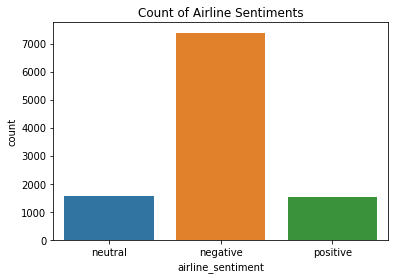

In [11]:
sns.countplot(x = df.airline_sentiment).set_title("Count of Airline Sentiments")
plt.show()

More negative tweet have been posted than both positive and neurtral tweet.

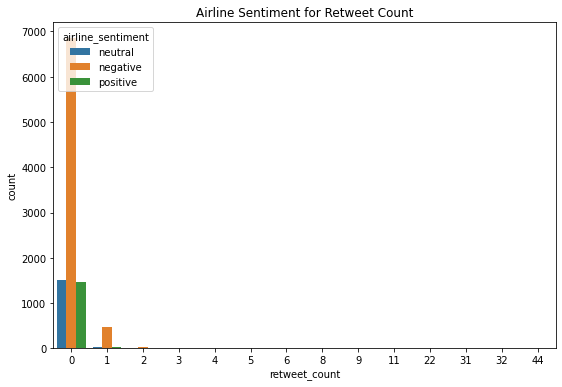

In [12]:
plt.figure(figsize=(9, 6))
sns.countplot(x = df.retweet_count, hue = df.airline_sentiment).set_title("Airline Sentiment for Retweet Count")
plt.show()
# from this graph we can understand that if a text is being retweeted it can wither be negative or positive

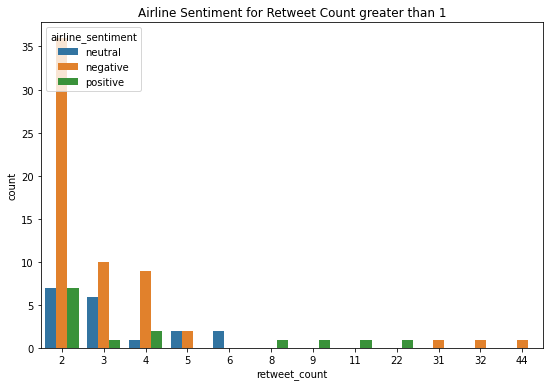

In [13]:
plt.figure(figsize=(9, 6))
sns.countplot(x = df[df.retweet_count>1].retweet_count, hue = df.airline_sentiment).set_title("Airline Sentiment for Retweet Count greater than 1")
plt.show()
# from this graph we can understand that if a text is being retweeted it can wither be negative or positive

From the above graph we can see that if there is retweet, it can be postive, negative or neutral. It not necessarily be a negative tweet.

In [14]:
df["negativereason"].value_counts()

Customer Service Issue         2487
Late Flight                    1372
Can't Tell                      797
Cancelled Flight                703
Lost Luggage                    604
Bad Flight                      452
Flight Attendant Complaints     414
Flight Booking Problems         340
longlines                       148
Damaged Luggage                  65
Name: negativereason, dtype: int64

In [15]:
print("Count of Negative Reasons Provided : ",df["negativereason"].value_counts().sum())
print(df.airline_sentiment.value_counts())
# We are able to see that count of Negative Reasons = Negative Airline Sentiments.
# So for every Negative Airline Sentiment Some Reason is Provided

Count of Negative Reasons Provided :  7382
negative    7382
neutral     1548
positive    1515
Name: airline_sentiment, dtype: int64


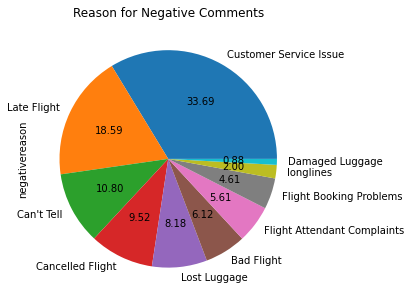

In [16]:
plt.figure(figsize=(9, 6))
df.negativereason.value_counts().plot(kind='pie', autopct='%.2f',figsize=(5, 5), title = "Reason for Negative Comments")
plt.show()

In the airline business the major problems are "Customer Service Issue" followed by "Late Flight" issues

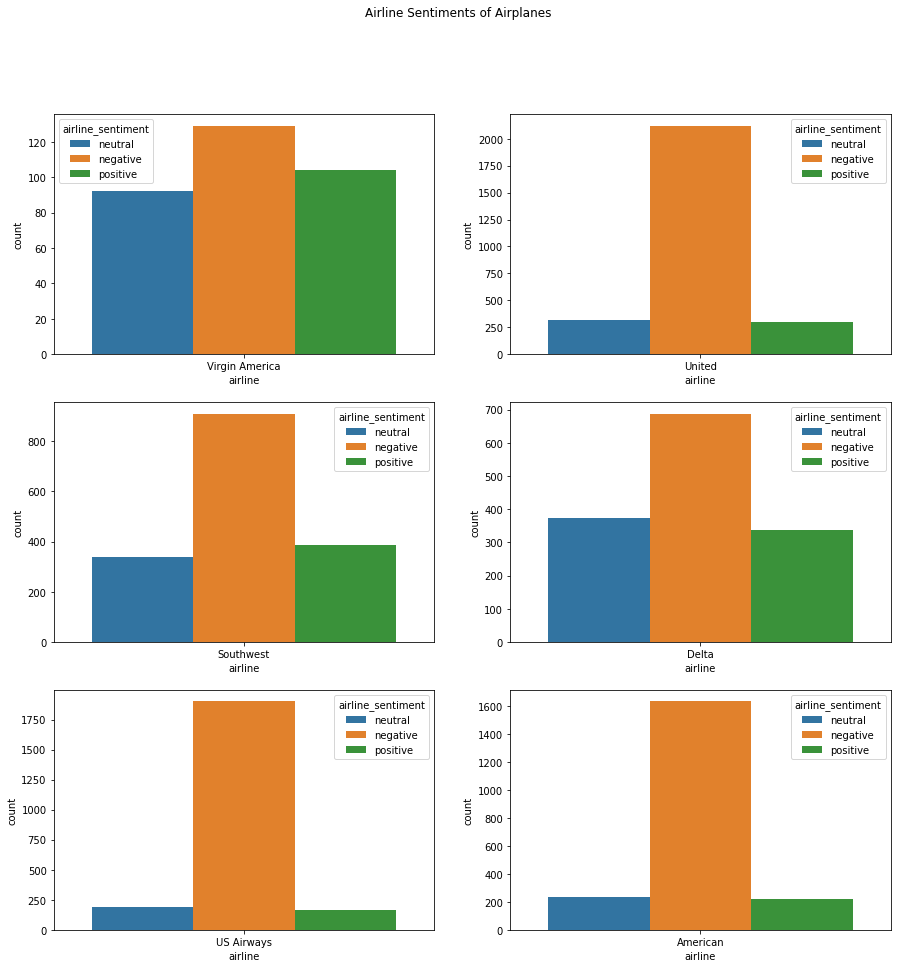

In [17]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
fig.suptitle("Airline Sentiments of Airplanes")
cnt = 0
for i in range(0,3):
  for j in range(0,2):
    Airline = list(df.airline.unique())[cnt]
    cnt += 1
    # print(Airline, i+j, i, j)
    sns.countplot(x = "airline" , hue = df.airline_sentiment, data = df[df['airline']== Airline], ax= ax[i][j])
plt.show()

 From the above graphs, we able to see that "Virgin America" airline has lowest count of tweets approx around 500 tweets.

 "United", "American", "US Airways","Sowthwest" have more negative tweets than postive and neutral.

#### **Dropping Features**

* The features "airline_sentiment_gold", "negativereason_gold", "tweet_coord" have more than 60% of data missing, so we can omit them

* Since we know that all tweets are above 1 confidence level we can drop "airline_sentiment_confidence" 

* We cannot use the feature "negativereason" as we cannot get this input from the user, we will be getting only the tweets from twitter, so we omit this feature and "negativereason_confidence" also.

* Just based on the user_timezone, tweet_location, name, tweet_created,tweet_id and tweet_coord

* For finding the tweet sentiment we do not need the airlines name so we drop it

In [18]:
df.drop(["airline_sentiment_gold", "negativereason_gold", "tweet_coord","airline_sentiment_confidence" ,"negativereason"
, "negativereason_confidence","user_timezone", "tweet_location", "name", "tweet_created" ,"tweet_id","retweet_count","airline"], axis =1 , inplace = True)
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


## **Preprocessing of Text**

In [19]:
#Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.
# a copy of stopwords is taken here so that the original file is not changed
stop_words = stopwords.words('english').copy()
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We can see that the stopwords contain several negative words like 'no', "not", "don't", 'ain', 'aren', "aren't", these words along with thier next words determine the meaning/sentiment of the sentence.Example: "Happy" and "Not Happy".

So these words are very important for determining sentiment of the tweet and cannot be removed as stopwords.

In [20]:
# A list "del_words" is created, it contains the negative stopwords
del_words = ['no', "not", "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", "shouldn", "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't"]

# Removing the negative stopwords from stopwords list
for dlt in del_words:
  stop_words.remove(dlt)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

**Creating a Function clean_text the preprocess the tweet/text**

* The text is split into words
* Words which are stop words or twitter account name ( starting with '@' ) or website links ( starting with 'http') or ampersand are removed
* Words are converted to Lower case
* All negative stopwords in del_words are replaced with 'not'
* Only the English alphabets in the word is retained.
* The POS tag (Part of Speech tag) of the word is identified and passed to Lemmatizer to obtain root word.
* If Error is thrown, then word is passed to Lemmarizer without the POS tag. In this case the POS tag is defaultly considered as a noun.
* Finally the word added to the result string. Once all the words in the text are preprocessed, the string "result" is returned.

In [21]:
lemmatizer = WordNetLemmatizer()

def clean_text(tx):
  tx = tx.replace('..',' ').split(" ") 
  result = "" # creating an empty string to store the cleaned words
  for word in tx:
    word = word.strip('\n')
    word = word.strip('â€œ')
    
    if word not in stop_words and not word.startswith('@') and not 'http' in word and word != "&amp;":
      word = word.lower()
      # since all words like haven't, couldn't simply mean no (ie) not
      if word in del_words:
        word = "not" # replacing ll the negative stopwords with not
      word = re.sub("[^a-zA-Z]","",word)  # only Capital and Small Alphabet characters are allowed in the list
      # try to get the part of speech tag of the word and pass to the lemmatizer, 
      # if POS tag not found and erroe thrown then it is passed without POS tag here it will be considered as a noun
      try: 
        word = lemmatizer.lemmatize(word,nltk.pos_tag([word])[0][1][0].lower()) 
      except (KeyError,IndexError): 
        word = lemmatizer.lemmatize(word)
      
      # checking that the cleaned word ia a valid word or not
      if word != "":
        result = result + " " + word
  return result

In [22]:
negative_words = "" # these is created as a data for wordcloud of negative words
positive_words = ""
neutral_words = ""

# cleaned text are added along with the respective airline sentiments words
df['cleaned_text'] = np.nan
for idx in range(0,df.shape[0]):
  result = clean_text(df.text.iloc[idx])
  df.cleaned_text.iloc[idx] = result
  for word in result.split(" "):
    if df.airline_sentiment.iloc[idx] == 'negative':
      negative_words = negative_words + " " + word
    elif df.airline_sentiment.iloc[idx] == 'neutral' :
      neutral_words = neutral_words + " " + word
    else:
      positive_words = positive_words + " " + word

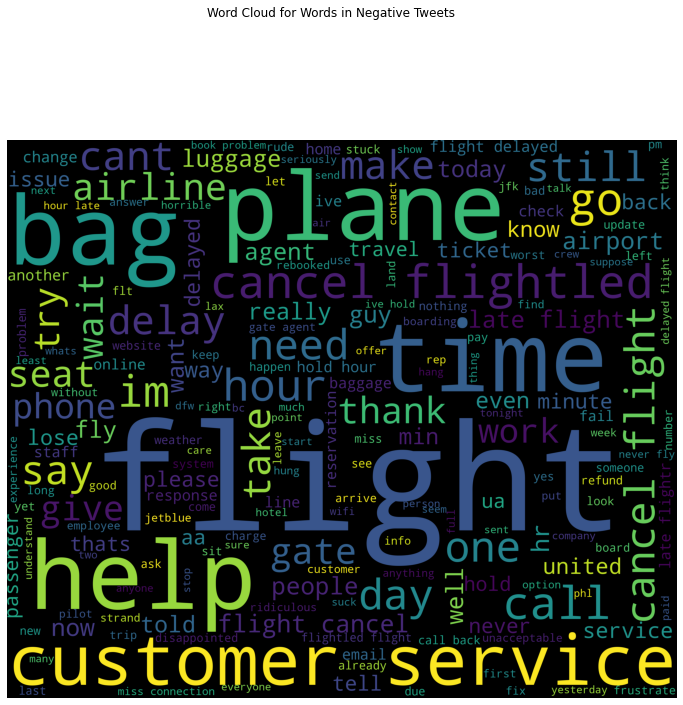

In [23]:
#wordcloud is generated for negative words in df after cleaning
wordcloud_neg = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(negative_words)

plt.figure(1,figsize=(12, 12))
plt.suptitle("Word Cloud for Words in Negative Tweets")
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

From the above word cloud we can observe that the negative tweets have these words repeatedly:

* cancel
* delay
* late flight

<Figure size 432x288 with 0 Axes>

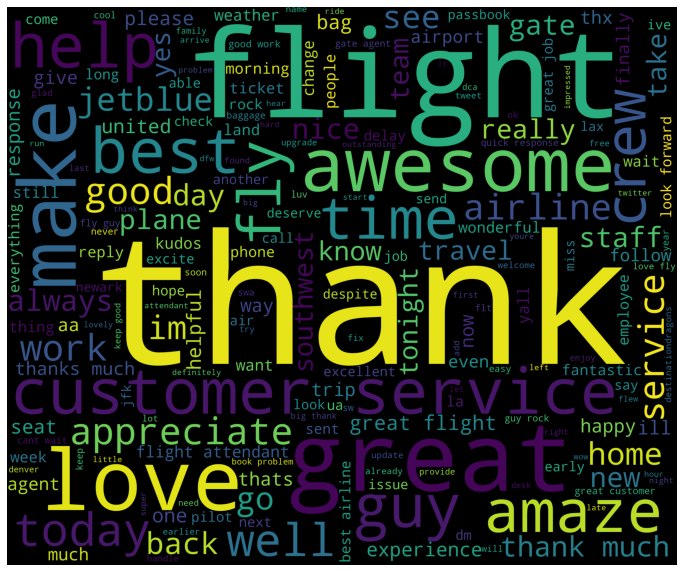

In [24]:
#wordcloud is generated for positive words in df after cleaning
wordcloud_pos = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(positive_words)
plt.suptitle("Word Cloud for Words in Positive Tweets")
plt.figure(2,figsize=(12, 12))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

From the above word cloud we can observe that the postive tweets have these words repeatedly:

* great
* thank
* love
* awesome

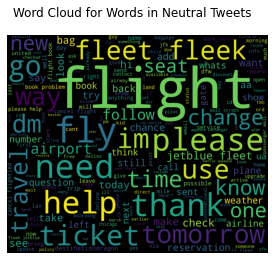

In [25]:
#wordcloud is generated for neutral words in df after cleaning
wordcloud_neut = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(neutral_words)
plt.suptitle("Word Cloud for Words in Neutral Tweets")
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_neut)
plt.axis('off')
plt.show()

From the above word cloud we can observe that the neutral tweets have these words repeatedly:

* need
* please
* help

## **Model Selection**

In [26]:
# a dataframe is created to store the results of various models run

model_performance = pd.DataFrame(None, columns= ['Model name','Accuracy','Precision','Recall','F1 - Score'])

### **UNIGRAM**

#### **Vectorization of Dataset for Unigram**

In [27]:
# creating the cleaned tweets into vectors (bag of words)
bag_vectorizer = CountVectorizer(ngram_range=(1,1)) 
cnt_vct = bag_vectorizer.fit_transform(df.cleaned_text)

In [28]:
cnt_vct.shape

(10445, 8641)

In [29]:
# spliting the data to train and text 
Y = df.airline_sentiment
x_train, x_test, y_train , y_test = train_test_split(cnt_vct, Y, stratify = Y, test_size = 0.2, random_state = 19)

#### **MultinomialNB - Unigram**

In [30]:
MNB = MultinomialNB()

In [31]:
# creating a Multinomial Naive Bayes Model with Unigram 
MNB_1gram = MNB.fit(x_train, y_train)
pred1 = MNB_1gram.predict(x_test)

acc = round( accuracy_score(y_test, pred1),4)
precision = round(precision_score(y_test, pred1, average=None).mean(),4)
recall = round(recall_score(y_test, pred1 , average=None).mean(),4)
f1 = round(f1_score(y_test, pred1 , average=None).mean(),4)

model_performance.loc[0] = ['MultinomialNB - Unigram', acc, precision, recall,f1]
model_performance.loc[0]


Model name    MultinomialNB - Unigram
Accuracy                       0.8348
Precision                      0.8004
Recall                           0.68
F1 - Score                      0.722
Name: 0, dtype: object

#### **LinearSVC - Unigram**

In [32]:
lin_SVC = LinearSVC()

lin_SVC_1gram = GridSearchCV(lin_SVC, param_grid = {'C':[0.01, 0.05,0.1, 0.25, 0.5,0.75,1]}) 
lin_SVC_1gram.fit(x_train, y_train)
pred2 = lin_SVC_1gram.predict(x_test)

acc = round( accuracy_score(y_test, pred2),4)
precision = round(precision_score(y_test, pred2, average=None).mean(),4)
recall = round(recall_score(y_test, pred2 , average=None).mean(),4)
f1 = round(f1_score(y_test, pred2 , average=None).mean(),4)

model_performance.loc[1] = ['LinearSVC - Unigram', acc, precision, recall,f1]
model_performance.loc[1]

Model name    LinearSVC - Unigram
Accuracy                   0.8803
Precision                  0.8358
Recall                     0.7847
F1 - Score                 0.8074
Name: 1, dtype: object

#### **RandomForest - Unigram**

In [33]:
Random_Forest = RandomForestClassifier()
RF_1gram = GridSearchCV(Random_Forest, param_grid = {'n_estimators' : [100,200,400],
                                                    'min_samples_split' : np.arange(2,6),
                                                    'min_samples_leaf' : np.arange(2,4)
                                                    }) 
RF_1gram.fit(x_train, y_train)
pred3 = RF_1gram.predict(x_test)

acc = round( accuracy_score(y_test, pred3),4)
precision = round(precision_score(y_test, pred3, average=None).mean(),4)
recall = round(recall_score(y_test, pred3, average=None).mean(),4)
f1 = round(f1_score(y_test, pred3, average=None).mean(),4)

model_performance.loc[2] = ['RandomForest - Unigram', acc, precision, recall,f1]
model_performance.loc[2]

Model name    RandomForest - Unigram
Accuracy                       0.832
Precision                     0.8176
Recall                        0.6429
F1 - Score                    0.6987
Name: 2, dtype: object

In [34]:
RF_1gram.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400}

### **BIGRAM**

#### Vectorization of dataset for Bigram

In [35]:
# creating the cleaned tweets into vectors for 2 grams
bag_vectorizer_2 = CountVectorizer(ngram_range=(2,2)) 
cnt_vct2 = bag_vectorizer_2.fit_transform(df.cleaned_text)

In [36]:
x_train2, x_test2, y_train2 , y_test2 = train_test_split(cnt_vct2, Y, stratify = Y, test_size = 0.2, random_state = 19)

#### **MultinomialNB - Bigram**

In [37]:
MNB_2gram = MNB.fit(x_train2,y_train2)
pred4 = MNB_2gram.predict(x_test2)

acc = round( accuracy_score(y_test2, pred4 ),4)
precision = round(precision_score(y_test2, pred4 , average=None).mean(),4)
recall = round(recall_score(y_test2, pred4, average=None).mean(),4)
f1 = round(f1_score(y_test2, pred4, average=None).mean(),4)

model_performance.loc[3] = ['MultinomialNB - Bigram', acc, precision, recall,f1]
model_performance.loc[3]

Model name    MultinomialNB - Bigram
Accuracy                      0.6616
Precision                      0.567
Recall                        0.6133
F1 - Score                     0.578
Name: 3, dtype: object

#### **LinearSVC - Bigram**

In [38]:
lin_SVC_2gram = GridSearchCV(lin_SVC,param_grid = {'C':[0.01, 0.05, 0.25, 0.5, 1]}) 
lin_SVC_2gram.fit(x_train2, y_train2)
pred5 = lin_SVC_2gram.predict(x_test2)

acc = round( accuracy_score(y_test2, pred5),4)
precision = round(precision_score(y_test2, pred5, average=None).mean(),4)
recall = round(recall_score(y_test2, pred5, average=None).mean(),4)
f1 = round(f1_score(y_test2, pred5, average=None).mean(),4)

model_performance.loc[4] = ['LinearSVC - Bigram', acc, precision, recall,f1]
model_performance.loc[4]

Model name    LinearSVC - Bigram
Accuracy                   0.786
Precision                 0.7328
Recall                    0.5697
F1 - Score                0.6165
Name: 4, dtype: object

#### **RandomForest - Bigram**

In [39]:
RF_2gram = GridSearchCV(Random_Forest, param_grid = {'n_estimators' : [100,200,400],
                                                    'min_samples_split' : np.arange(2,6),
                                                    'min_samples_leaf' : np.arange(2,4)
                                                    }) 
RF_2gram.fit(x_train2,y_train2)
pred6 = RF_2gram.predict(x_test2)

acc = round( accuracy_score(y_test2, pred6),4)
precision = round(precision_score(y_test2, pred6, average=None).mean(),4)
recall = round(recall_score(y_test2, pred6, average=None).mean(),4)
f1 = round(f1_score(y_test2, pred6, average=None).mean(),4)

model_performance.loc[5] = ['RandomForest - Bigram', acc, precision, recall,f1]
model_performance.loc[5]

Model name    RandomForest - Bigram
Accuracy                     0.7674
Precision                    0.7957
Recall                       0.4855
F1 - Score                   0.5165
Name: 5, dtype: object

In [40]:
RF_2gram.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

## **Evaluation of Model Performance**

In [41]:
model_performance

,Model name,Accuracy,Precision,Recall,F1 - Score
0,MultinomialNB - Unigram,0.8348,0.8004,0.6800,0.7220
1,LinearSVC - Unigram,0.8803,0.8358,0.7847,0.8074
2,RandomForest - Unigram,0.8320,0.8176,0.6429,0.6987
3,MultinomialNB - Bigram,0.6616,0.5670,0.6133,0.5780
4,LinearSVC - Bigram,0.7860,0.7328,0.5697,0.6165
5,RandomForest - Bigram,0.7674,0.7957,0.4855,0.5165


"LinearSVC - Unigram" gives us the highest **F1-Score of 80.74%**. so let us take cross_val_score to check if it is good.

In [42]:
Lin_SVC_score = cross_val_score(lin_SVC_1gram,cnt_vct,Y,cv=5)

In [43]:
Lin_SVC_score

array([0.86596458, 0.87218765, 0.87266635, 0.87170895, 0.86787937])

In [44]:
Lin_SVC_score.mean()

0.8700813786500717

**After cross_val_score, we obtained an average accuracy of 87%. So let us finlize the LinearSVC model for Airline Twitter Sentiment Prediction.**


## **Testing with sample text**

In [45]:
df_sample = pd.DataFrame(columns=["cleaned_text"])
df_sample.loc[0] = [clean_text("@VirginAmerica, The flight was delayed so much")]
df_sample.loc[1] = [clean_text("@VirginAmerica, wonderful for the flight")]
df_sample.loc[2] = [clean_text("@VirginAmerica, great flight")]
df_sample.loc[3] = [clean_text("@VirginAmerica, A suggestion u good improve the seat")]
df_sample.loc[4] = [clean_text("@VirginAmerica, service was bad")]
df_sample.loc[5] = [clean_text("@VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?")]
df_sample.loc[6] = [clean_text("@VirginAmerica I spoke with a representative that offered no solution, I am a loyal customer who flies on @VirginAtlantic as well")]
df_sample.loc[7] = [clean_text("@united thats weak. See ya ðŸ‘‹")]
df_sample.loc[3] = [clean_text("@VirginAmerica, it was awesome journey")]
df_sample

,cleaned_text
0,the flight delayed much
1,wonderful flight
2,great flight
3,awesome journey
4,service bad
5,hi virgin im hold minute earlier flight la ny...
6,i spoke representative offer not solution i l...
7,thats weak see ya


In [46]:
cv = bag_vectorizer.transform(df_sample.cleaned_text)
cv

<8x8641 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [47]:
df_sample['predicted'] = lin_SVC_1gram.predict(cv)
df_sample

,cleaned_text,predicted
0,the flight delayed much,negative
1,wonderful flight,positive
2,great flight,positive
3,awesome journey,positive
4,service bad,negative
5,hi virgin im hold minute earlier flight la ny...,neutral
6,i spoke representative offer not solution i l...,negative
7,thats weak see ya,negative


# **Prediction Of Reason for Negative Airline Sentiment**

If a tweet is a negative tweet, the reason for the negative tweet/ disappointment in the customer is predicted.

This will be useful for the airline company to identify the area to improved.

## **Load data and Text Preprocessing**

In [48]:
df_2 = pd.read_csv("Tweets.csv")
df_2.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [49]:
df_negative = df_2[df_2.airline_sentiment == "negative"]
df_negative.shape

(9178, 15)

Here column "negativereason" is our target for predicting the negative reason.

In [50]:
df_negative.negativereason.unique()

array(['Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [51]:
df_negative.negativereason_confidence.describe()

count    9178.000000
mean        0.731769
std         0.238276
min         0.312200
25%         0.645300
50%         0.680600
75%         1.000000
max         1.000000
Name: negativereason_confidence, dtype: float64

We can see that Feature "Negativereason" has confidence starting from 0.312, we cannot be sure of these data and use them in our model so let us remove them. We can remove rows/datapoints with "negativereason_confidence" less than 1.

In [52]:
print("Before dropping rows with less negativereason_confidence", df_negative.shape)
df_negative.drop(df_negative[df_negative["negativereason_confidence"]<1].index, inplace = True)
print("After dropping rows with less negativereason_confidence",df_negative.shape)
# Before dropping rows with less negativereason_confidence (9178, 15)
# After dropping rows with less negativereason_confidence (3445, 15)

Before dropping rows with less negativereason_confidence (9178, 15)
After dropping rows with less negativereason_confidence (3436, 15)


Since we have already done the EDA, we know which all variables are not useful let us just drop them. Since "negativereason" is the target variable we retain it.

In [53]:
df_negative.drop(["airline_sentiment_gold", "negativereason_gold", "tweet_coord","airline_sentiment_confidence" ,
          "negativereason_confidence","user_timezone", "tweet_location", "name",
         "tweet_created" ,"tweet_id","retweet_count","airline", "airline_sentiment"], axis =1 , inplace = True)
df_negative.head()

,negativereason,text
4,Can't Tell,@VirginAmerica and it's a really big bad thing...
17,Bad Flight,@VirginAmerica I flew from NYC to SFO last we...
25,Customer Service Issue,@VirginAmerica status match program. I applie...
28,Bad Flight,@VirginAmerica amazing to me that we can't get...
30,Flight Booking Problems,@VirginAmerica hi! I just bked a cool birthday...


Since we have already created a function to clean the text we can make use of it here again

In [54]:
df_negative['cleaned_text'] = np.nan
for idx in range(0,df_negative.shape[0]):
  result = clean_text(df_negative.text.iloc[idx])
  df_negative.cleaned_text.iloc[idx] = result

In [55]:
df_negative.head()

,negativereason,text,cleaned_text
4,Can't Tell,@VirginAmerica and it's a really big bad thing...,really big bad thing
17,Bad Flight,@VirginAmerica I flew from NYC to SFO last we...,i flew nyc sfo last week not fully sit seat d...
25,Customer Service Issue,@VirginAmerica status match program. I applie...,status match program i apply three week call ...
28,Bad Flight,@VirginAmerica amazing to me that we can't get...,amaze cant get cold air vent vx noair worstfl...
30,Flight Booking Problems,@VirginAmerica hi! I just bked a cool birthday...,hi i bked cool birthday trip you cant add ele...


## **Model Selection**

In [56]:
# Since we have new dataframe for negative tweets we have to create new count_vector for negative words
# creating the cleaned tweets into vectors
bag_vectorizer_neg = CountVectorizer(ngram_range=(1,1))# , max_features = 2500)
cnt_vct_neg = bag_vectorizer_neg.fit_transform(df_negative.cleaned_text)

In [57]:
Y_n = df_negative.negativereason
x_n_train, x_n_test, y_n_train , y_n_test = train_test_split(cnt_vct_neg, Y_n, stratify = Y_n, test_size = 0.2, random_state = 19)


In [58]:
model_performance_negative = pd.DataFrame(None, columns= ['Model name','Accuracy','Precision','Recall','F1 - Score'])

#### **MultinomialNB - Unigram**

In [59]:
MNB = MultinomialNB()

# creating a Multinomial Naive Bayes Model with Unigram 
MNB_1gram_neg = MNB.fit(x_n_train,y_n_train)
pred7 = MNB_1gram_neg.predict(x_n_test)

acc = round( accuracy_score(y_n_test, pred7),4)
precision = round(precision_score(y_n_test, pred7, average=None).mean(),4)
recall = round(recall_score(y_n_test, pred7, average=None).mean(),4)
f1 = round(f1_score(y_n_test, pred7, average=None).mean(),4)

model_performance_negative.loc[0] = ['MultinomialNB - Unigram', acc, precision, recall,f1]
model_performance_negative.loc[0]

Model name    MultinomialNB - Unigram
Accuracy                       0.7863
Precision                      0.6243
Recall                         0.4272
F1 - Score                     0.4595
Name: 0, dtype: object

#### **LinearSVC - Unigram**

In [60]:
lin_SVC = LinearSVC()
lin_SVC_1gram_neg = GridSearchCV(lin_SVC,param_grid = {'C':[0.01, 0.05, 0.25, 0.5, 1,5, 10]}) 
lin_SVC_1gram_neg.fit(x_n_train,y_n_train)
pred8 = lin_SVC_1gram_neg.predict(x_n_test)

acc = round( accuracy_score(y_n_test, pred8 ),4)
precision = round(precision_score(y_n_test, pred8, average=None).mean(),4)
recall = round(recall_score(y_n_test, pred8 , average=None).mean(),4)
f1 = round(f1_score(y_n_test, pred8 , average=None).mean(),4)

model_performance_negative.loc[1] = ['LinearSVC - Unigram', acc, precision, recall,f1]
model_performance_negative.loc[1]

Model name    LinearSVC - Unigram
Accuracy                   0.8503
Precision                  0.7651
Recall                     0.6164
F1 - Score                  0.654
Name: 1, dtype: object

#### **RandomForest - Unigram**

In [61]:
Random_Forest = RandomForestClassifier()
RF_1gram_neg = GridSearchCV(Random_Forest, param_grid = {'n_estimators' : [100,200,400],
                                                    'min_samples_split' : np.arange(2,6),
                                                    'min_samples_leaf' : np.arange(2,4)
                                                    }) 
RF_1gram_neg.fit(x_n_train,y_n_train)
pred9 = RF_1gram_neg.predict(x_n_test)

acc = round( accuracy_score(y_n_test, pred9 ),4)
precision = round(precision_score(y_n_test, pred9, average=None).mean(),4)
recall = round(recall_score(y_n_test, pred9 , average=None).mean(),4)
f1 = round(f1_score(y_n_test, pred9 , average=None).mean(),4)

model_performance_negative.loc[2] = ['RandomForest - Unigram', acc, precision, recall,f1]
model_performance_negative.loc[2]

Model name    RandomForest - Unigram
Accuracy                      0.8096
Precision                     0.6687
Recall                        0.4559
F1 - Score                    0.4897
Name: 2, dtype: object

## **Model Evaluation**

In [62]:
model_performance_negative

,Model name,Accuracy,Precision,Recall,F1 - Score
0,MultinomialNB - Unigram,0.7863,0.6243,0.4272,0.4595
1,LinearSVC - Unigram,0.8503,0.7651,0.6164,0.6540
2,RandomForest - Unigram,0.8096,0.6687,0.4559,0.4897


"LinearSVC - Unigram" gives us the highest **F1-Score of 65.40%**. So let us take cross_val_score to check if it is good.


In [63]:
Lin_SVC_NEGATIVE_score = cross_val_score(lin_SVC_1gram_neg,cnt_vct_neg,Y_n,cv=5)

In [64]:
Lin_SVC_NEGATIVE_score

array([0.81104651, 0.82532751, 0.82969432, 0.8209607 , 0.83551674])

In [65]:
Lin_SVC_NEGATIVE_score.mean()

0.8245091567651738

The LinearSVC models gives an average accuracy of 82.45%. Since it has the highest F1-Score let us finalize this model.

## **Testing with sample text**

In [66]:
df_sample = pd.DataFrame(columns=["cleaned_text"])
df_sample.loc[0] = [clean_text("@VirginAmerica, The flight was delayed so much")]
df_sample.loc[1] = [clean_text("@VirginAmerica, it was a horrible journey")]
df_sample.loc[2] = [clean_text("@VirginAmerica, my luggage was damaged")]
df_sample.loc[3] = [clean_text("@VirginAmerica, @VirginAmerica trying to get through for an hour. can someone help me please? :/")]
df_sample.loc[4] = [clean_text("@VirginAmerica, service was bad")]
df_sample.loc[5] = [clean_text("@VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?")]
df_sample.loc[6] = [clean_text("@VirginAmerica I spoke with a representative that offered no solution, I am a loyal customer who flies on @VirginAtlantic as well")]
df_sample.loc[7] = [clean_text("@united thats weak. See ya ðŸ‘‹")]

df_sample

,cleaned_text
0,the flight delayed much
1,horrible journey
2,luggage damage
3,try get hour someone help please
4,service bad
5,hi virgin im hold minute earlier flight la ny...
6,i spoke representative offer not solution i l...
7,thats weak see ya


In [67]:
cv = bag_vectorizer_neg.transform(df_sample.cleaned_text)
cv

<8x4272 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [68]:
df_sample['predicted'] = lin_SVC_1gram_neg.predict(cv)
df_sample

,cleaned_text,predicted
0,the flight delayed much,Late Flight
1,horrible journey,Customer Service Issue
2,luggage damage,Damaged Luggage
3,try get hour someone help please,Customer Service Issue
4,service bad,Customer Service Issue
5,hi virgin im hold minute earlier flight la ny...,Late Flight
6,i spoke representative offer not solution i l...,Customer Service Issue
7,thats weak see ya,Can't Tell


# **Final Function for Sentiment Prediction and Negative Reason Prediction**

In [69]:
def Sentiment_Prediction(text):
  cleaned_text = clean_text(text)
  cleaned_text = pd.Series(cleaned_text)
  cv_sentiment = bag_vectorizer.transform(cleaned_text)
  predicted = lin_SVC_1gram.predict(cv_sentiment)
  if predicted == "positive":
    print("The Tweet is a POSITIVE tweet")
  elif predicted == "neutral":
    print("The Tweet is a NEUTRAL tweet")
  elif predicted == "negative":
    print("The Tweet is a NEGATIVE tweet")
    cv_negative = bag_vectorizer_neg.transform(cleaned_text)
    predicted_reason = lin_SVC_1gram_neg.predict(cv_negative)
    # print(predicted_reason, type(predicted_reason))
    print("The reason for the Negative Tweet is",predicted_reason[0].upper())

In [70]:
Sentiment_Prediction("@VirginAmerica I talked to the representative thrice yet did not get an answer")

The Tweet is a NEGATIVE tweet
The reason for the Negative Tweet is CUSTOMER SERVICE ISSUE


In [71]:
Sentiment_Prediction("@USAirways The Attend was very polite and had a great journey")

The Tweet is a POSITIVE tweet


In [72]:
Sentiment_Prediction("@AmericanAir The jouney was ok")

The Tweet is a NEUTRAL tweet
